## Assignment-III

In the following code, you can see that test accuracy is 70.6 %. Tune the following model by changing the parameters that can increase the test accuracy as much as possible.

Note: Data to be used is airplane and bird dataset with 500 images in each class.
*******************************************************************************************************************************
**Solution:**: You can see in the compilation cell, we have incorporated **sgd** optimizer in place of **adam** and the test accuracy is improved to 76.33%.  

**Import the necessary packages**

In [1]:
import os                   # accessing folders and files 
import numpy as np          # to use functions of numpy 

In [2]:
from keras.models import Sequential          #  Sequential class is created and model layers are created and added to it
from keras.layers import Activation, Dense   # 
from keras import optimizers
from keras import applications
from keras.models import Model
import matplotlib.pyplot as plt
from keras.utils import to_categorical  # Converts a class vector to binary class matrix.

Using TensorFlow backend.


**Following function reads images from the folder.**

In [3]:
def flatten_images(folder):               # Path of folder (dataset)
    images=[]                             # list contatining  all images
    for filename in os.listdir(folder):
        print(filename)
        img=plt.imread(folder+filename)  # reading image (Folder path and image name )
        img=np.array(img)                #
        img=img.flatten()                # Flatten image 
        images.append(img)               # Appending all images in 'images' list 
    return(images)

In [5]:
airplane_data = flatten_images('data_500/airplane/')  # calling the function above to compute airplane images

10008_airplane.png
10010_airplane.png
10020_airplane.png
10024_airplane.png
10031_airplane.png
10043_airplane.png
10050_airplane.png
10061_airplane.png
10064_airplane.png
10115_airplane.png
10124_airplane.png
10130_airplane.png
10141_airplane.png
10146_airplane.png
10148_airplane.png
10151_airplane.png
10159_airplane.png
10197_airplane.png
10202_airplane.png
10205_airplane.png
10212_airplane.png
10215_airplane.png
10243_airplane.png
10265_airplane.png
10266_airplane.png
10267_airplane.png
10275_airplane.png
10297_airplane.png
10301_airplane.png
10323_airplane.png
10326_airplane.png
10330_airplane.png
10332_airplane.png
10334_airplane.png
10338_airplane.png
10340_airplane.png
10343_airplane.png
10353_airplane.png
10355_airplane.png
10365_airplane.png
10394_airplane.png
10399_airplane.png
10401_airplane.png
10425_airplane.png
10486_airplane.png
10487_airplane.png
10493_airplane.png
10499_airplane.png
10513_airplane.png
10516_airplane.png
10545_airplane.png
10548_airplane.png
10553_airpla

14712_airplane.png
14727_airplane.png
14732_airplane.png
14754_airplane.png
14778_airplane.png
14782_airplane.png
14796_airplane.png
14806_airplane.png
14807_airplane.png
14848_airplane.png
29_airplane.png
30_airplane.png
35_airplane.png
49_airplane.png
77_airplane.png
9910_airplane.png
9920_airplane.png
9925_airplane.png
9934_airplane.png
9945_airplane.png
9966_airplane.png
9983_airplane.png
9984_airplane.png
9985_airplane.png


In [6]:
airplane_data=np.array(airplane_data)    # converting list into numpy array
airplane_data.shape                      # print shape of array

(500, 3072)

In [7]:
# same as above but for bird data
bird_data=flatten_images('data_500/bird/')
bird_data=np.array(bird_data)
bird_data.shape

10018_bird.png
10027_bird.png
10057_bird.png
10083_bird.png
10089_bird.png
10093_bird.png
10152_bird.png
10155_bird.png
10160_bird.png
10180_bird.png
10204_bird.png
10217_bird.png
10240_bird.png
10241_bird.png
10263_bird.png
10280_bird.png
10289_bird.png
10360_bird.png
10378_bird.png
10389_bird.png
10391_bird.png
10396_bird.png
10398_bird.png
10406_bird.png
10409_bird.png
10412_bird.png
10417_bird.png
10428_bird.png
10433_bird.png
10436_bird.png
10469_bird.png
10474_bird.png
10480_bird.png
10498_bird.png
10505_bird.png
10512_bird.png
10567_bird.png
10582_bird.png
10588_bird.png
10591_bird.png
10594_bird.png
10608_bird.png
10612_bird.png
10616_bird.png
10624_bird.png
10628_bird.png
10651_bird.png
10660_bird.png
10671_bird.png
10683_bird.png
10700_bird.png
10725_bird.png
10742_bird.png
10750_bird.png
10756_bird.png
10767_bird.png
10801_bird.png
10802_bird.png
10807_bird.png
10833_bird.png
10842_bird.png
10860_bird.png
10866_bird.png
10885_bird.png
10898_bird.png
108_bird.png
10901_bird.p

(500, 3072)

In [8]:
# np.ones creates an array of ones (where 1 is the label) with only 
# one column and number of rows same as airplane images
airplane_labels=np.ones((len(airplane_data),1))
# np.zeros creates an array of zeros (where 0 is the label) with only
# one column and number of rows same as bird features
bird_labels=np.zeros((len(bird_data),1))

x_labels=np.zeros((len(bird_data),1))
x_labels[:]=2

**Create feature vector and corresponding label vector containing both the classes airplane and bird**

In [9]:
labels=np.concatenate((airplane_labels,bird_labels),axis=0)
features=np.concatenate((airplane_data,bird_data),axis=0)

In [10]:
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.3)

**ANN will be used for classification** 

In [11]:
# Build the model.
model = Sequential([
  Dense(1024, activation='relu', input_shape=(3072,)),
  Dense(128, activation='relu'),
  Dense(32, activation='relu'),  
  Dense(2, activation='softmax'),
])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dense_2 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 66        
Total params: 3,282,146
Trainable params: 3,282,146
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compile the model.
import tensorflow as tf
opt = optimizers.sgd(learning_rate=0.01)
model.compile(
  optimizer=opt,
  loss='categorical_crossentropy',
  metrics=['accuracy',tf.keras.metrics.AUC(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()]
)

# Train the model.
history=model.fit(
  X_train,
  to_categorical(y_train),
  epochs=30,
  batch_size=128,
  validation_data=(X_test, to_categorical(y_test))  # A binary matrix representation of the input.
)

Train on 700 samples, validate on 300 samples
Epoch 1/30
700/700 [==============================] - 1s 1ms/step - loss: 0.7082 - accuracy: 0.5100 - auc: 0.4914 - precision: 0.4971 - recall: 0.4971 - val_loss: 0.6552 - val_accuracy: 0.6267 - val_auc: 0.5632 - val_precision: 0.5363 - val_recall: 0.5363
Epoch 2/30
700/700 [==============================] - 0s 484us/step - loss: 0.6375 - accuracy: 0.6971 - auc: 0.6039 - precision: 0.5869 - recall: 0.5869 - val_loss: 0.6648 - val_accuracy: 0.5600 - val_auc: 0.6252 - val_precision: 0.6021 - val_recall: 0.6021
Epoch 3/30
700/700 [==============================] - 0s 477us/step - loss: 0.6462 - accuracy: 0.6300 - auc: 0.6280 - precision: 0.5985 - recall: 0.5985 - val_loss: 0.6585 - val_accuracy: 0.6067 - val_auc: 0.6387 - val_precision: 0.6084 - val_recall: 0.6084
Epoch 4/30
700/700 [==============================] - 0s 472us/step - loss: 0.6746 - accuracy: 0.5900 - auc: 0.6461 - precision: 0.6096 - recall: 0.6096 - val_loss: 0.6091 - val_accu

In [14]:
results=model.evaluate(X_test,to_categorical(y_test),batch_size=128)
print('test loss', results[0])
print('test acc', results[1])
print('test auc', results[2])
print('test precision', results[3])
print('test recall', results[4])

300/300 [==============================] - 0s 261us/step
test loss 0.5209890270233154
test acc 0.7633333206176758
test auc 0.7922548651695251
test precision 0.7251882553100586
test recall 0.7251882553100586


**Training and testing accuracy**

dict_keys(['val_loss', 'val_accuracy', 'val_auc', 'val_precision', 'val_recall', 'loss', 'accuracy', 'auc', 'precision', 'recall'])


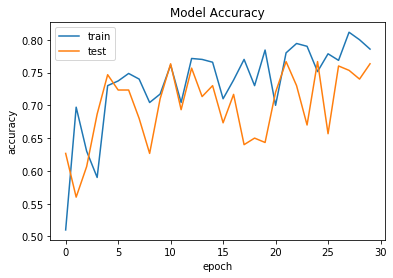

In [15]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Test each image inside test_images folder placed inside data folder and find its corresponding class**

In [17]:
test_folder='data_500/test_images/'
results=[]
for filename in os.listdir(test_folder):
    temp=[]
    img=plt.imread(test_folder+filename)
    img=np.array(img)
    img=img.flatten()
    inp=np.reshape(img,(1,3072))
    prediction_result=model.predict(inp)
    x=np.argmax(prediction_result)
    if(x==0):
        pred_class_name='bird'
    else:
        x=1
        pred_class_name='Airplane'
    temp.append(filename)
    temp.append(pred_class_name)
    temp.append(prediction_result[0,x])
    results.append(temp)

**Results with image name and predicted class name**

In [18]:
results=np.array(results)

In [19]:
results

array([['38560_bird.png', 'bird', '0.90390265'],
       ['38563_bird.png', 'bird', '0.89645445'],
       ['38565_bird.png', 'bird', '0.8248244'],
       ['38573_bird.png', 'bird', '0.9159563'],
       ['38592_bird.png', 'bird', '0.8343415'],
       ['38594_bird.png', 'bird', '0.93929464'],
       ['38605_bird.png', 'bird', '0.9060695'],
       ['38622_bird.png', 'bird', '0.9384453'],
       ['38623_bird.png', 'bird', '0.8579225'],
       ['38638_bird.png', 'bird', '0.63773495'],
       ['49856_airplane.png', 'Airplane', '0.9017072'],
       ['49863_airplane.png', 'Airplane', '0.56721413'],
       ['49868_airplane.png', 'Airplane', '0.90146095'],
       ['49869_airplane.png', 'Airplane', '0.50929135'],
       ['49891_airplane.png', 'Airplane', '0.7386056'],
       ['49921_airplane.png', 'Airplane', '0.56316453'],
       ['49930_airplane.png', 'Airplane', '0.6251647'],
       ['49941_airplane.png', 'bird', '0.7431213'],
       ['49992_airplane.png', 'Airplane', '0.5617568'],
       ['499

References:
1. https://scikit-learn.org/stable/
2. https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5
3. https://keras.io/

**Content prepared Principal Coordinator: Prof. Aparajita Ojha Local Coordinator: Dr. Ayan Seal Tutorial Assistant: Mr. Samir Jain (Phd Student)**

**E&ICT Academy PDPM IIITDM Jabalpur**